## Internship Project on

## Sentiment Analysis of Tweets for US Airline with Interactive Dashboard using ML Model

## *by* 

## *Agbo Chijioke Benjamin*

## *###########################################################################*

### Import Libraries

In [1]:
import re
import string   
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Larry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Larry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Larry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Larry\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Larry\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Larry\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-

### Import Dataset

In [3]:
df=pd.read_csv("Tweets.csv")

In [4]:
df.head(13)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,latitude,longitude
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35.888455,-119.273781
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,37.770971,-119.941025
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,35.684863,-119.709299
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,37.061159,-119.279135
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,36.790587,-120.867752
5,5.703008e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,36.226653,-119.290923
6,5.703006e+17,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,33.778164,-119.565305
7,5.703002e+17,neutral,0.6340,NaN,NaN,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800,36.485239,-119.301841
8,5.703000e+17,positive,0.6559,NaN,NaN,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800,36.208968,-119.087950
9,5.702955e+17,positive,1.0000,NaN,NaN,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27 -0800,37.694475,-119.006906


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  latitude                      14640 non-null  float64
 11  longitude                     14640 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.3+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
latitude                           0
longitude                          0
dtype: int64

In [8]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count,latitude,longitude
count,1.464000e+04,14640.000000,10522.000000,14640.000000,14640.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650,39.139901,-98.687615
std,7.791112e+14,0.162830,0.330440,0.745778,3.599528,18.731383
min,5.675883e+17,0.335000,0.000000,0.000000,24.295539,-121.892659
25%,5.685592e+17,0.692300,0.360600,0.000000,36.664544,-119.106167
50%,5.694779e+17,1.000000,0.670600,0.000000,40.060817,-101.278813
75%,5.698905e+17,1.000000,1.000000,0.000000,40.759700,-74.002575
max,5.703106e+17,1.000000,1.000000,44.000000,59.658972,-73.388100


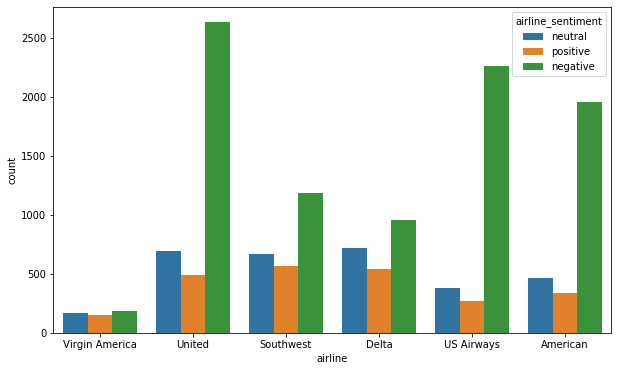

In [9]:
sns.countplot( x ="airline", hue="airline_sentiment", data = df);

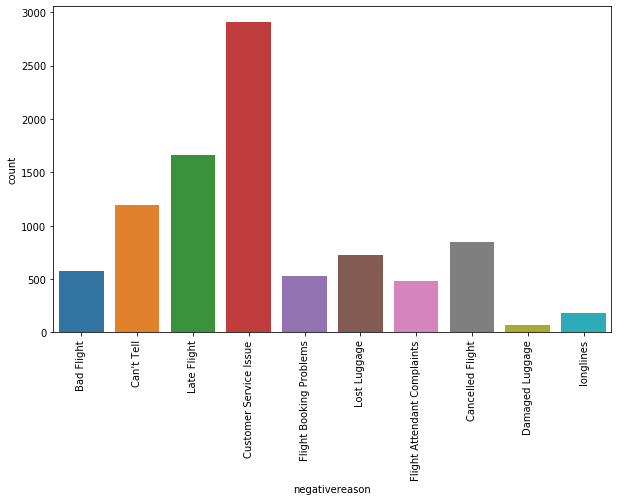

In [10]:
sns.countplot(x ="negativereason", data =df)
plt.xticks(rotation =90);

### Checking for the balance nature of the sentiment represented in pie chart using matplotlib

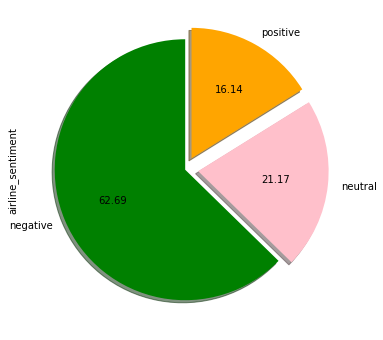

In [11]:
col=['green','pink', 'orange']
exp=(0,0.1,0.1)
df['airline_sentiment'].value_counts().plot(kind='pie', autopct='%.2f', shadow=True, colors=col, explode=exp, startangle=90)
plt.show()

### Checking for the balance nature of the sentiment represented in barplot using seaborn

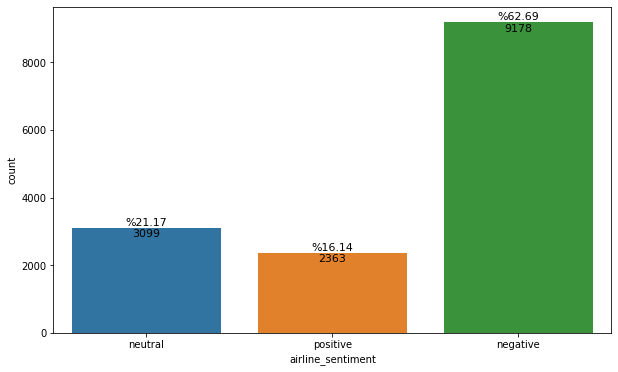

In [12]:
def labels(ax, df, xytext=(0, 0)):
    for bar in ax.patches: 
        ax.annotate('%{:.2f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=11, xytext=xytext, 
                    textcoords='offset points')

ax = sns.countplot(data =df, x = "airline_sentiment");
labels(ax, df)

### Data Cleaning

In [13]:
new_df=df.copy()

In [14]:
new_df["text"].head(50)

0                   @VirginAmerica What @dhepburn said.
1     @VirginAmerica plus you've added commercials t...
2     @VirginAmerica I didn't today... Must mean I n...
3     @VirginAmerica it's really aggressive to blast...
4     @VirginAmerica and it's a really big bad thing...
5     @VirginAmerica seriously would pay $30 a fligh...
6     @VirginAmerica yes, nearly every time I fly VX...
7     @VirginAmerica Really missed a prime opportuni...
8       @virginamerica Well, I didn't…but NOW I DO! :-D
9     @VirginAmerica it was amazing, and arrived an ...
10    @VirginAmerica did you know that suicide is th...
11    @VirginAmerica I &lt;3 pretty graphics. so muc...
12    @VirginAmerica This is such a great deal! Alre...
13    @VirginAmerica @virginmedia I'm flying your #f...
14                               @VirginAmerica Thanks!
15        @VirginAmerica SFO-PDX schedule is still MIA.
16    @VirginAmerica So excited for my first cross c...
17    @VirginAmerica  I flew from NYC to SFO las

In [15]:
new_df["text"]=new_df["text"].str.replace("(@+\w+)", "")
new_df["text"].head(50)

0                                           What  said.
1      plus you've added commercials to the experien...
2      I didn't today... Must mean I need to take an...
3      it's really aggressive to blast obnoxious "en...
4              and it's a really big bad thing about it
5      seriously would pay $30 a flight for seats th...
6      yes, nearly every time I fly VX this “ear wor...
7      Really missed a prime opportunity for Men Wit...
8                      Well, I didn't…but NOW I DO! :-D
9      it was amazing, and arrived an hour early. Yo...
10     did you know that suicide is the second leadi...
11     I &lt;3 pretty graphics. so much better than ...
12     This is such a great deal! Already thinking a...
13      I'm flying your #fabulous #Seductive skies a...
14                                              Thanks!
15                       SFO-PDX schedule is still MIA.
16     So excited for my first cross country flight ...
17      I flew from NYC to SFO last week and cou

In [16]:
stop_words = stopwords.words('english')

In [17]:
def tweets_cleaning(data):    
    #   i. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())   
    #   ii. Remove punctuation marks
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]    
    #   iii. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]   
    #    iv. lemma(captions)
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]   
    #   v. joining
    return " ".join(text_cleaned)

In [18]:
new_df["text"] = new_df["text"].apply(tweets_cleaning)

In [19]:
new_df["text"].head(50)

0                                                  said
1          plus youve added commercial experience tacky
2          didnt today must mean need take another trip
3     really aggressive blast obnoxious entertainmen...
4                                  really big bad thing
5     seriously would pay flight seat didnt playing ...
6         yes nearly every time fly vx ear worm go away
7     really missed prime opportunity men without ha...
8                                                  well
9                 amazing arrived hour early youre good
10    know suicide second leading cause death among ...
11    lt pretty graphic much better minimal iconography
12    great deal already thinking trip amp havent ev...
13    im flying fabulous seductive sky u take stress...
14                                               thanks
15                                   schedule still mia
16    excited first cross country flight lax mco ive...
17    flew nyc sfo last week couldnt fully sit s

### Removing Rare/unique Words

In [20]:
" ".join(new_df["text"]).split()

['said',
 'plus',
 'youve',
 'added',
 'commercial',
 'experience',
 'tacky',
 'didnt',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'another',
 'trip',
 'really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'guest',
 'face',
 'amp',
 'little',
 'recourse',
 'really',
 'big',
 'bad',
 'thing',
 'seriously',
 'would',
 'pay',
 'flight',
 'seat',
 'didnt',
 'playing',
 'really',
 'bad',
 'thing',
 'flying',
 'va',
 'yes',
 'nearly',
 'every',
 'time',
 'fly',
 'vx',
 'ear',
 'worm',
 'go',
 'away',
 'really',
 'missed',
 'prime',
 'opportunity',
 'men',
 'without',
 'hat',
 'parody',
 'http',
 'well',
 'amazing',
 'arrived',
 'hour',
 'early',
 'youre',
 'good',
 'know',
 'suicide',
 'second',
 'leading',
 'cause',
 'death',
 'among',
 'teen',
 'lt',
 'pretty',
 'graphic',
 'much',
 'better',
 'minimal',
 'iconography',
 'great',
 'deal',
 'already',
 'thinking',
 'trip',
 'amp',
 'havent',
 'even',
 'gone',
 'trip',
 'yet',
 'p',
 'im',
 'flying',
 'fabulous',
 'seductiv

In [21]:
rare_words = pd.Series(" ".join(new_df["text"]).split()).value_counts()

In [22]:
rare_words

flight             4537
get                1374
http               1210
hour               1136
thanks             1076
                   ... 
fong                  1
wilmington            1
gettingoffplane       1
idiotic               1
highhopes             1
Length: 9872, dtype: int64

In [23]:
rare_words = rare_words[rare_words <= 2]

In [24]:
rare_words.index

Index(['portfolio', 'convo', 'postcode', 'rtb', 'sked', 'expressed', 'chkd',
       'fax', 'allende', 'cha',
       ...
       'purse', 'newamerican', 'bebetter', 'falseadvertising', 'iwantcoffee',
       'fong', 'wilmington', 'gettingoffplane', 'idiotic', 'highhopes'],
      dtype='object', length=6152)

In [25]:
new_df["text"] = new_df["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))

In [26]:
new_df["text"].head(50)

0                                                  said
1                plus youve added commercial experience
2          didnt today must mean need take another trip
3     really aggressive entertainment guest face amp...
4                                  really big bad thing
5     seriously would pay flight seat didnt playing ...
6                  yes nearly every time fly vx go away
7     really missed prime opportunity men without ha...
8                                                  well
9                 amazing arrived hour early youre good
10    know suicide second leading cause death among ...
11                                lt pretty much better
12    great deal already thinking trip amp havent ev...
13    im flying fabulous sky u take stress away trav...
14                                               thanks
15                                   schedule still mia
16    excited first cross country flight lax mco ive...
17    flew nyc sfo last week couldnt fully sit s

### Features Extraction & Labeling

In [27]:
new_df=new_df[["airline_sentiment", "text"]]

In [28]:
new_df.head(50)

,airline_sentiment,text
0,neutral,said
1,positive,plus youve added commercial experience
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive entertainment guest face amp...
4,negative,really big bad thing
5,negative,seriously would pay flight seat didnt playing ...
6,positive,yes nearly every time fly vx go away
7,neutral,really missed prime opportunity men without ha...
8,positive,well
9,positive,amazing arrived hour early youre good


### Splitting the Dataset into the Training Set and Test Set

In [29]:
from sklearn.model_selection import train_test_split
X=new_df["text"]
y=new_df["airline_sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=32)

### Breaking down the text into words using CountVectorizer

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()  
X_train_count=vectorizer.fit_transform(X_train)
X_test_count=vectorizer.transform(X_test)

In [31]:
type(X_train_count)

scipy.sparse.csr.csr_matrix

In [32]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
result=pd.DataFrame(X_train_count.toarray(),columns=vectorizer.get_feature_names())

In [34]:
result

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,accommodate,accommodating,accommodation,accomplished,according,...,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,yousuck,youth,youve,yr,yuma,yup,yvr,yyz,zero,zone,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
X_train

3061                         kidding ill send stuff thanks
6338     corrected attendant error gave attitude made r...
8080     weve runway hour water pressure low back maint...
11793    day cancelled flightations driven airport diff...
389            atlantic plough lone furrow middleeast http
                               ...                        
3112                               thank much able contact
14402    email address send issue guy screwed rebooked ...
13398    flightd cancelled flightations afternoon depar...
7738                   plane hopefully longer mercy thanks
14172                   pathetic gate agent lie face fault
Name: text, Length: 10248, dtype: object

In [36]:
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model,X_test, y_test)

### Logistic Regression

Imbalance Logistic Regression Model
Test_Set
              precision    recall  f1-score   support

    negative       0.73      0.96      0.83      2753
     neutral       0.71      0.27      0.39       930
    positive       0.77      0.46      0.57       709

    accuracy                           0.73      4392
   macro avg       0.74      0.56      0.60      4392
weighted avg       0.73      0.73      0.70      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.97      0.84      6425
     neutral       0.76      0.30      0.43      2169
    positive       0.78      0.51      0.62      1654

    accuracy                           0.75     10248
   macro avg       0.76      0.59      0.63     10248
weighted avg       0.76      0.75      0.72     10248



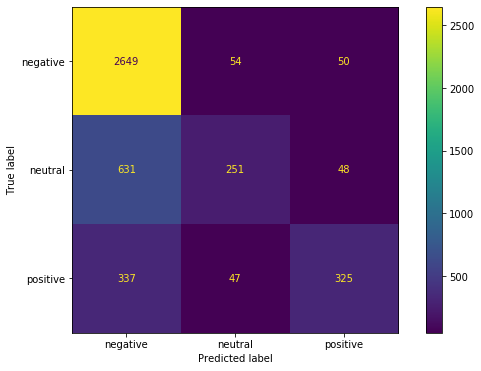

In [37]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.02, max_iter=1000)
LR.fit(X_train_count,y_train)
print("Imbalance Logistic Regression Model")
eval(LR, X_train_count, X_test_count)

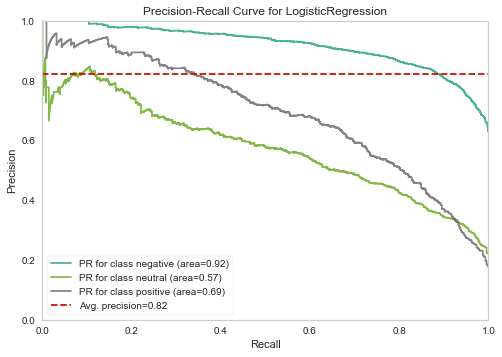

In [38]:
from yellowbrick.classifier import PrecisionRecallCurve
PRC1=PrecisionRecallCurve(
    LogisticRegression(C=0.02, max_iter=1000),
    classes=LR.classes_,
    per_class=True,
    cmap="Dark2"
)
PRC1.fit(X_train_count,y_train)
PRC1.score(X_test_count, y_test)
PRC1.show();

In [39]:
PRC1.score_

{'negative': 0.9184292441715813,
 'neutral': 0.5736367376121035,
 'positive': 0.6903836387059215,
 'micro': 0.8226482059575932}

In [40]:
for i in ['negative','positive','neutral']:
  print(f"{i}: {PRC1.score_ [i]}")

negative: 0.9184292441715813
positive: 0.6903836387059215
neutral: 0.5736367376121035


Balanced Logistic Regression Model
Test_Set
              precision    recall  f1-score   support

    negative       0.90      0.71      0.80      2753
     neutral       0.47      0.74      0.57       930
    positive       0.64      0.67      0.66       709

    accuracy                           0.71      4392
   macro avg       0.67      0.71      0.67      4392
weighted avg       0.77      0.71      0.73      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.92      0.73      0.82      6425
     neutral       0.51      0.78      0.62      2169
    positive       0.67      0.74      0.70      1654

    accuracy                           0.74     10248
   macro avg       0.70      0.75      0.71     10248
weighted avg       0.80      0.74      0.76     10248



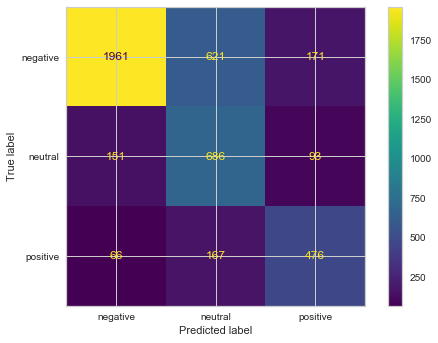

In [41]:
y_pred = LR.predict(X_test_count)
LR_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
LR_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
LR_AP_neg = PRC1.score_["negative"]
LR = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')  
LR.fit(X_train_count,y_train)
print("Balanced Logistic Regression Model")
eval(LR, X_train_count, X_test_count)

### Support Vectors Machine

Imbalance Support  Vectors Machine Model
Test_Set
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      2753
     neutral       0.57      0.55      0.56       930
    positive       0.68      0.66      0.67       709

    accuracy                           0.76      4392
   macro avg       0.70      0.69      0.69      4392
weighted avg       0.76      0.76      0.76      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.96      0.97      0.96      6425
     neutral       0.89      0.85      0.87      2169
    positive       0.93      0.93      0.93      1654

    accuracy                           0.94     10248
   macro avg       0.93      0.92      0.92     10248
weighted avg       0.94      0.94      0.94     10248



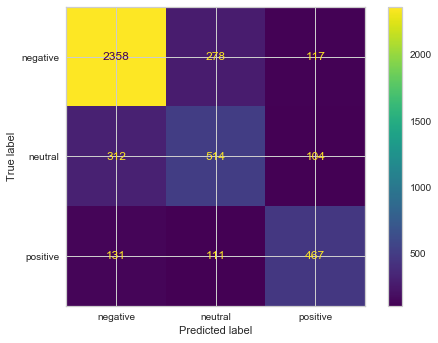

In [42]:
from sklearn.svm import LinearSVC
SVM=LinearSVC()
SVM.fit(X_train_count,y_train)
print("Imbalance Support  Vectors Machine Model")
eval(SVM, X_train_count, X_test_count)

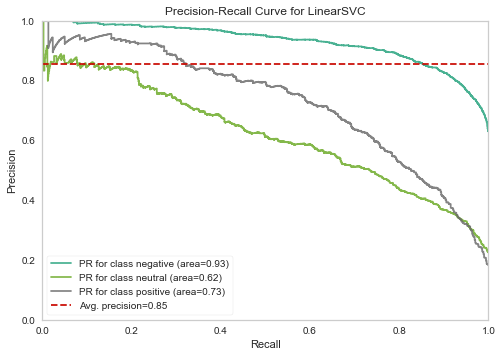

In [43]:
PRC2=PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=SVM.classes_,
    per_class=True,
    cmap="Dark2"
)
PRC2.fit(X_train_count,y_train)
PRC2.score(X_test_count, y_test)
PRC2.show();

In [44]:
PRC2.score_

{'negative': 0.9288681883550337,
 'neutral': 0.6183501357368401,
 'positive': 0.7280640800281839,
 'micro': 0.8548246272497452}

In [45]:
for i in ['negative','positive','neutral']:
  print(f"{i}: {PRC2.score_ [i]}")

negative: 0.9288681883550337
positive: 0.7280640800281839
neutral: 0.6183501357368401


Balanced Support Vectors Machine Model
Test_Set
              precision    recall  f1-score   support

    negative       0.77      0.94      0.85      2753
     neutral       0.68      0.38      0.49       930
    positive       0.77      0.56      0.64       709

    accuracy                           0.76      4392
   macro avg       0.74      0.63      0.66      4392
weighted avg       0.75      0.76      0.74      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.80      0.96      0.88      6425
     neutral       0.79      0.45      0.58      2169
    positive       0.81      0.63      0.71      1654

    accuracy                           0.80     10248
   macro avg       0.80      0.68      0.72     10248
weighted avg       0.80      0.80      0.79     10248



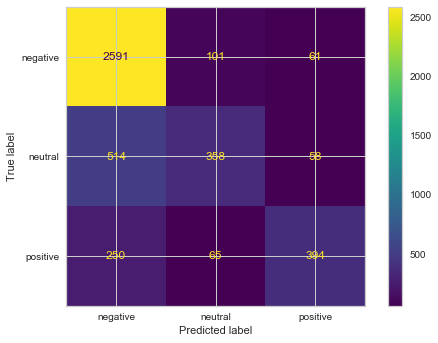

In [46]:
y_pred = SVM.predict(X_test_count)
SVM_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
SVM_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
SVM_AP_neg = PRC2.score_["negative"]
SVM=LinearSVC(C=0.01)
SVM.fit(X_train_count,y_train)
print("Balanced Support Vectors Machine Model")
eval(SVM, X_train_count, X_test_count)

### Naive Bayes

Imbalance Naive Bayes(Multinomial) Model
Test_Set
              precision    recall  f1-score   support

    negative       0.81      0.88      0.84      2753
     neutral       0.61      0.48      0.54       930
    positive       0.68      0.65      0.67       709

    accuracy                           0.76      4392
   macro avg       0.70      0.67      0.68      4392
weighted avg       0.75      0.76      0.75      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.86      0.92      0.89      6425
     neutral       0.75      0.61      0.67      2169
    positive       0.81      0.80      0.80      1654

    accuracy                           0.84     10248
   macro avg       0.81      0.78      0.79     10248
weighted avg       0.83      0.84      0.83     10248



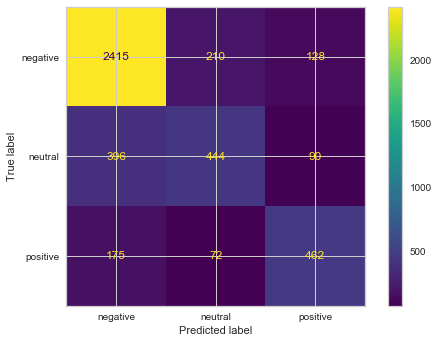

In [47]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
NB=MultinomialNB()
NB.fit(X_train_count,y_train)
print("Imbalance Naive Bayes(Multinomial) Model")
eval(NB, X_train_count, X_test_count)

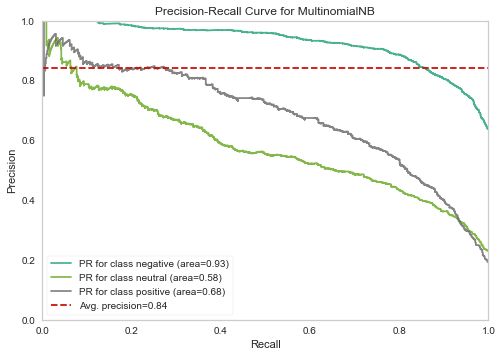

In [48]:
PRC3=PrecisionRecallCurve(MultinomialNB(),
                           classes=NB.classes_,
                           per_class=True,
                           cmap="Dark2")
PRC3.fit(X_train_count,y_train)
PRC3.score(X_test_count, y_test)
PRC3.show();

In [49]:
PRC3.score_

{'negative': 0.9272868931278213,
 'neutral': 0.5777951210105041,
 'positive': 0.6829538370546349,
 'micro': 0.8415484258944456}

In [50]:
for i in ['negative','positive','neutral']:
  print(f"{i}: {PRC3.score_ [i]}")

negative: 0.9272868931278213
positive: 0.6829538370546349
neutral: 0.5777951210105041


Balanced Naive Bayes(Multinomial) Model
Test_Set
              precision    recall  f1-score   support

    negative       0.81      0.88      0.84      2753
     neutral       0.61      0.48      0.54       930
    positive       0.68      0.65      0.67       709

    accuracy                           0.76      4392
   macro avg       0.70      0.67      0.68      4392
weighted avg       0.75      0.76      0.75      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.86      0.92      0.89      6425
     neutral       0.75      0.61      0.67      2169
    positive       0.81      0.80      0.80      1654

    accuracy                           0.84     10248
   macro avg       0.81      0.78      0.79     10248
weighted avg       0.83      0.84      0.83     10248



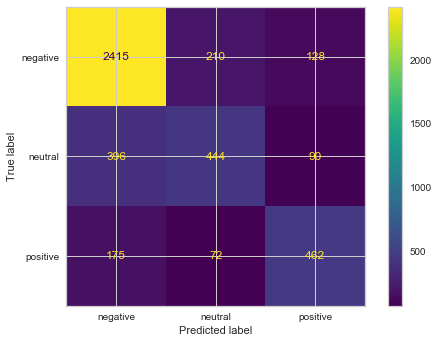

In [51]:
y_pred = NB.predict(X_test_count)
NB_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
NB_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
NB_AP_neg = PRC3.score_["negative"]
NB=MultinomialNB()
NB.fit(X_train_count,y_train)
print("Balanced Naive Bayes(Multinomial) Model")
eval(NB, X_train_count, X_test_count)

### Random Forest

Random Forest Model
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      2753
     neutral       0.82      0.12      0.21       930
    positive       0.77      0.43      0.55       709

    accuracy                           0.71      4392
   macro avg       0.76      0.51      0.53      4392
weighted avg       0.74      0.71      0.65      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.75      1.00      0.86      6425
     neutral       0.96      0.25      0.40      2169
    positive       0.93      0.65      0.77      1654

    accuracy                           0.78     10248
   macro avg       0.88      0.63      0.67     10248
weighted avg       0.82      0.78      0.75     10248



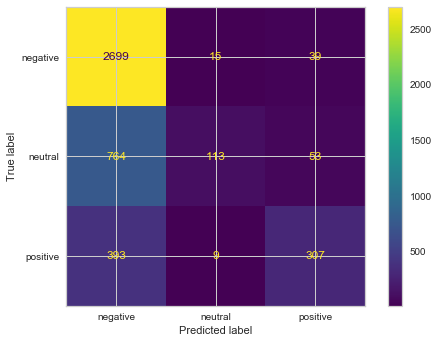

In [52]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
RF.fit(X_train_count, y_train)
print("Random Forest Model")
eval(RF, X_train_count, X_test_count)

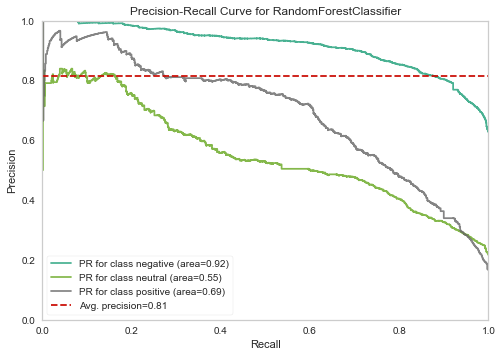

In [53]:
PRC4=PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1),
    classes=RF.classes_,
    per_class=True,
    cmap="Dark2"
)
PRC4.fit(X_train_count,y_train)
PRC4.score(X_test_count, y_test)
PRC4.show();

Balanced Random Forest Model
Test_Set
              precision    recall  f1-score   support

    negative       0.87      0.77      0.81      2753
     neutral       0.48      0.68      0.56       930
    positive       0.67      0.63      0.65       709

    accuracy                           0.73      4392
   macro avg       0.68      0.69      0.68      4392
weighted avg       0.76      0.73      0.74      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.98      0.84      0.91      6425
     neutral       0.63      0.93      0.75      2169
    positive       0.88      0.83      0.85      1654

    accuracy                           0.86     10248
   macro avg       0.83      0.87      0.84     10248
weighted avg       0.89      0.86      0.86     10248



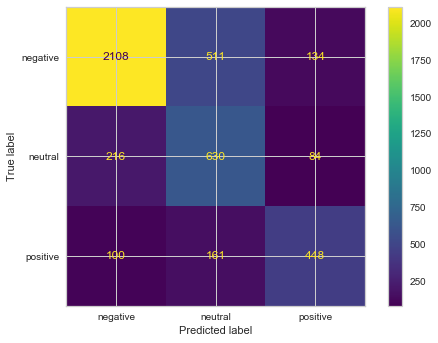

In [54]:
y_pred=RF.predict(X_test_count)
RF_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
RF_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
RF_AP_neg = PRC4.score_["negative"]
RF= RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
RF.fit(X_train_count, y_train)
print("Balanced Random Forest Model")
eval(RF, X_train_count, X_test_count)

###  Breaking down the text into words using TF-IDF (Term-Frequency-Times Inverse Document-Frequency) Transformation

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer=TfidfVectorizer()
X_train_tf_idf=tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf=tf_idf_vectorizer.transform(X_test)

In [56]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
result2=pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

In [58]:
result2

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,accommodate,accommodating,accommodation,accomplished,according,...,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,yousuck,youth,youve,yr,yuma,yup,yvr,yyz,zero,zone,zurich
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,0.0,0.0,0.0,0.0,0.537955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10244,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10245,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10246,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Logistic Regression

Logistic Regression Model
Test_Set
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      2753
     neutral       0.70      0.39      0.50       930
    positive       0.83      0.49      0.62       709

    accuracy                           0.76      4392
   macro avg       0.76      0.61      0.66      4392
weighted avg       0.76      0.76      0.74      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.80      0.98      0.88      6425
     neutral       0.82      0.49      0.62      2169
    positive       0.88      0.59      0.71      1654

    accuracy                           0.81     10248
   macro avg       0.84      0.69      0.74     10248
weighted avg       0.82      0.81      0.80     10248



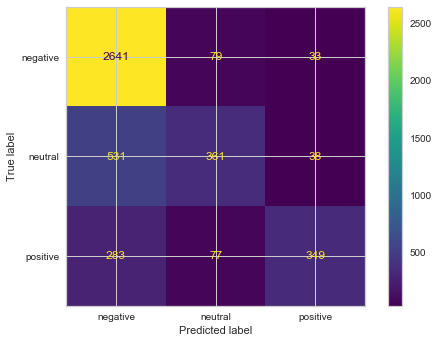

In [59]:
from sklearn.linear_model import LogisticRegression
LR2=LogisticRegression(C=0.4, max_iter=1000)
LR2.fit(X_train_tf_idf,y_train)
print("Logistic Regression Model")
eval(LR2, X_train_tf_idf, X_test_tf_idf)

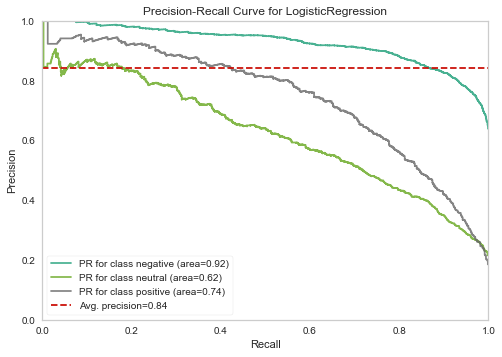

In [60]:
PRC_TF1=PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    classes=LR2.classes_,
    per_class=True,
    cmap="Dark2"
)
PRC_TF1.fit(X_train_tf_idf,y_train)
PRC_TF1.score(X_test_tf_idf, y_test)
PRC_TF1.show();

Balanced Logistic Regression Model
Test_Set
              precision    recall  f1-score   support

    negative       0.89      0.77      0.83      2753
     neutral       0.52      0.71      0.60       930
    positive       0.68      0.72      0.70       709

    accuracy                           0.75      4392
   macro avg       0.70      0.73      0.71      4392
weighted avg       0.78      0.75      0.76      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.94      0.81      0.87      6425
     neutral       0.62      0.81      0.70      2169
    positive       0.75      0.86      0.80      1654

    accuracy                           0.82     10248
   macro avg       0.77      0.82      0.79     10248
weighted avg       0.84      0.82      0.82     10248



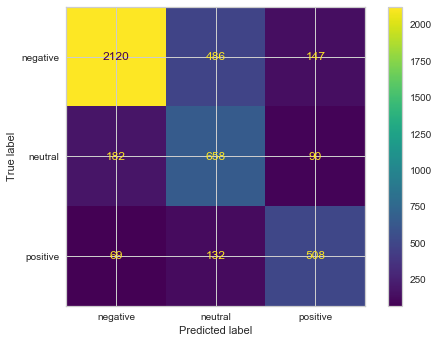

In [61]:
y_pred=LR2.predict(X_test_tf_idf)
LR2_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
LR2_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
LR2_tfidf_AP_neg = PRC_TF1.score_["negative"]
LR2 = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")  
LR2.fit(X_train_tf_idf,y_train)
print("Balanced Logistic Regression Model")
eval(LR2, X_train_tf_idf, X_test_tf_idf)

### Support Vectors Machine

Support Vectors Machine Model
Test_Set
              precision    recall  f1-score   support

    negative       0.77      0.95      0.85      2753
     neutral       0.70      0.39      0.50       930
    positive       0.82      0.54      0.65       709

    accuracy                           0.77      4392
   macro avg       0.76      0.63      0.67      4392
weighted avg       0.76      0.77      0.75      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.82      0.98      0.89      6425
     neutral       0.84      0.52      0.64      2169
    positive       0.89      0.67      0.77      1654

    accuracy                           0.83     10248
   macro avg       0.85      0.72      0.77     10248
weighted avg       0.83      0.83      0.82     10248



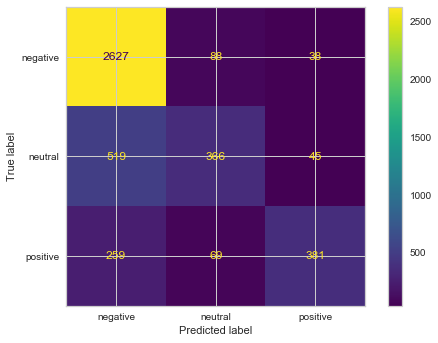

In [62]:
from sklearn.svm import LinearSVC
SVM2=LinearSVC(C=0.1)
SVM2.fit(X_train_tf_idf,y_train)
print("Support Vectors Machine Model")
eval(SVM2, X_train_tf_idf, X_test_tf_idf)

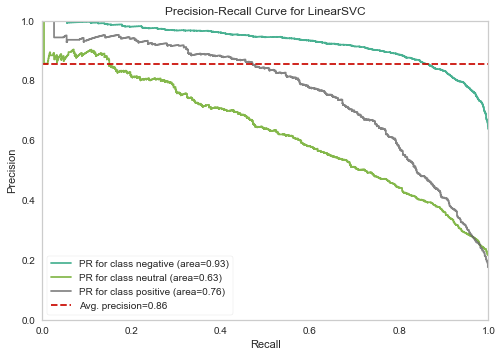

In [63]:
PRC_TF2=PrecisionRecallCurve(
    LinearSVC(C=0.1),
    classes=SVM2.classes_,
    per_class=True,
    cmap="Dark2"
)
PRC_TF2.fit(X_train_tf_idf,y_train)
PRC_TF2.score(X_test_tf_idf, y_test)
PRC_TF2.show();

Balanced Support Vectors Machine Model
Test_Set
              precision    recall  f1-score   support

    negative       0.67      0.99      0.80      2753
     neutral       0.76      0.08      0.14       930
    positive       0.85      0.26      0.40       709

    accuracy                           0.68      4392
   macro avg       0.76      0.44      0.45      4392
weighted avg       0.72      0.68      0.60      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.67      1.00      0.80      6425
     neutral       0.77      0.07      0.14      2169
    positive       0.89      0.30      0.44      1654

    accuracy                           0.69     10248
   macro avg       0.78      0.46      0.46     10248
weighted avg       0.73      0.69      0.60     10248



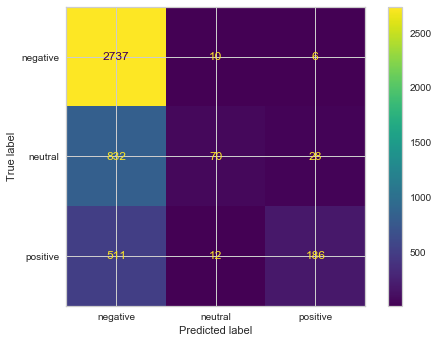

In [64]:
y_pred = SVM2.predict(X_test_tf_idf)
SVM2_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
SVM2_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
SVM2_tfidf_AP_neg = PRC_TF2.score_["negative"]
SVM2=LinearSVC(C=0.01)
SVM2.fit(X_train_tf_idf,y_train)
print("Balanced Support Vectors Machine Model")
eval(SVM2, X_train_tf_idf, X_test_tf_idf)

### Naive Bayes

Naive Bayes Model
Test_Set
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      2753
     neutral       0.74      0.27      0.40       930
    positive       0.86      0.37      0.52       709

    accuracy                           0.73      4392
   macro avg       0.77      0.54      0.58      4392
weighted avg       0.75      0.73      0.69      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.99      0.86      6425
     neutral       0.85      0.36      0.50      2169
    positive       0.92      0.50      0.65      1654

    accuracy                           0.78     10248
   macro avg       0.84      0.62      0.67     10248
weighted avg       0.80      0.78      0.75     10248



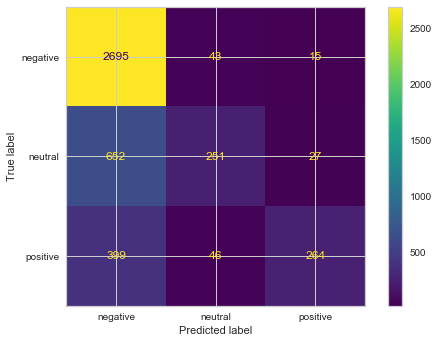

In [65]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
NB2=MultinomialNB()
NB2.fit(X_train_tf_idf,y_train)
print("Naive Bayes Model")
eval(NB2, X_train_tf_idf, X_test_tf_idf)

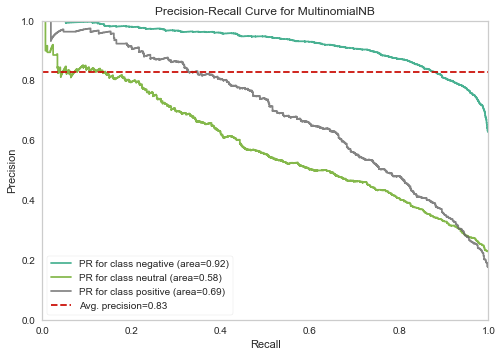

In [66]:
PRC_TF3=PrecisionRecallCurve(
    MultinomialNB(),
    classes=NB2.classes_,
    per_class=True,
    cmap="Dark2"
)
PRC_TF3.fit(X_train_tf_idf,y_train)
PRC_TF3.score(X_test_tf_idf, y_test)
PRC_TF3.show();

Balanced Naive Bayes Model
Test_Set
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      2753
     neutral       0.74      0.27      0.40       930
    positive       0.86      0.37      0.52       709

    accuracy                           0.73      4392
   macro avg       0.77      0.54      0.58      4392
weighted avg       0.75      0.73      0.69      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.99      0.86      6425
     neutral       0.85      0.36      0.50      2169
    positive       0.92      0.50      0.65      1654

    accuracy                           0.78     10248
   macro avg       0.84      0.62      0.67     10248
weighted avg       0.80      0.78      0.75     10248



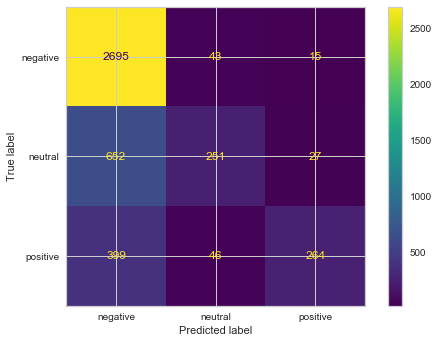

In [67]:
y_pred=NB2.predict(X_test_tf_idf)
NB2_tfidf_rec_neg=recall_score(y_test, y_pred, labels = ["negative"], average = None)
NB2_tfidf_f1_neg=f1_score(y_test, y_pred, labels = ["negative"], average = None)
NB2_tfidf_AP_neg=PRC_TF3.score_["negative"]
NB2=MultinomialNB()
NB2.fit(X_train_tf_idf,y_train)
print("Balanced Naive Bayes Model")
eval(NB2, X_train_tf_idf, X_test_tf_idf)

### Random Forest

Random Forest Model
Test_Set
              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      2753
     neutral       0.85      0.11      0.19       930
    positive       0.79      0.41      0.54       709

    accuracy                           0.71      4392
   macro avg       0.78      0.50      0.52      4392
weighted avg       0.74      0.71      0.64      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.74      1.00      0.85      6425
     neutral       0.98      0.23      0.37      2169
    positive       0.94      0.60      0.73      1654

    accuracy                           0.77     10248
   macro avg       0.89      0.61      0.65     10248
weighted avg       0.82      0.77      0.73     10248



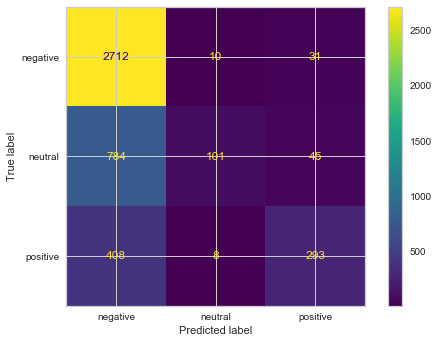

In [68]:
RF2=RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
RF2.fit(X_train_tf_idf, y_train)
print("Random Forest Model")
eval(RF2, X_train_tf_idf, X_test_tf_idf)

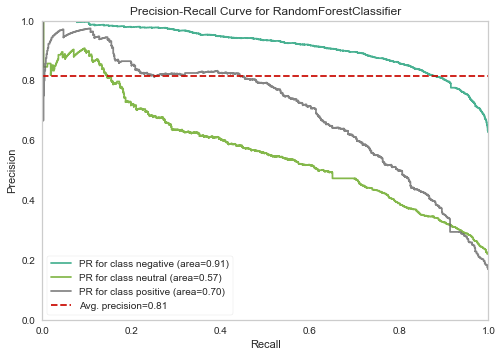

In [69]:
PRC_TF4=PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    classes=RF2.classes_,
    per_class=True,
    cmap="Dark2"
)
PRC_TF4.fit(X_train_tf_idf,y_train)
PRC_TF4.score(X_test_tf_idf, y_test)
PRC_TF4.show();

Balanced Random Forest Model
Test_Set
              precision    recall  f1-score   support

    negative       0.89      0.70      0.79      2753
     neutral       0.44      0.72      0.54       930
    positive       0.65      0.63      0.64       709

    accuracy                           0.69      4392
   macro avg       0.66      0.68      0.66      4392
weighted avg       0.75      0.69      0.71      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.73      0.82      6425
     neutral       0.49      0.81      0.61      2169
    positive       0.72      0.71      0.72      1654

    accuracy                           0.75     10248
   macro avg       0.71      0.75      0.72     10248
weighted avg       0.80      0.75      0.76     10248



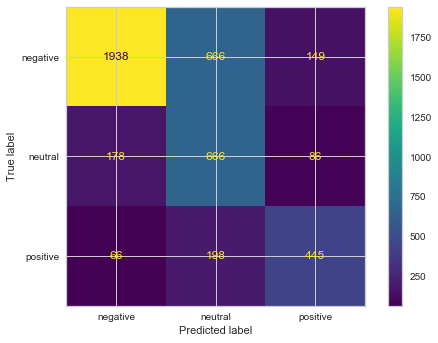

In [70]:
y_pred=RF2.predict(X_test_tf_idf)
RF2_tfidf_rec_neg=recall_score(y_test, y_pred, labels = ["negative"], average = None)
RF2_tfidf_f1_neg=f1_score(y_test, y_pred, labels = ["negative"], average = None)
RF2_tfidf_AP_neg=PRC_TF4.score_["negative"]
RF2=RandomForestClassifier(100, max_depth=15, random_state = 42, n_jobs = -1, class_weight="balanced")
RF2.fit(X_train_tf_idf, y_train)
print("Balanced Random Forest Model")
eval(RF2, X_train_tf_idf, X_test_tf_idf)

### Models Performance Measure Comparison

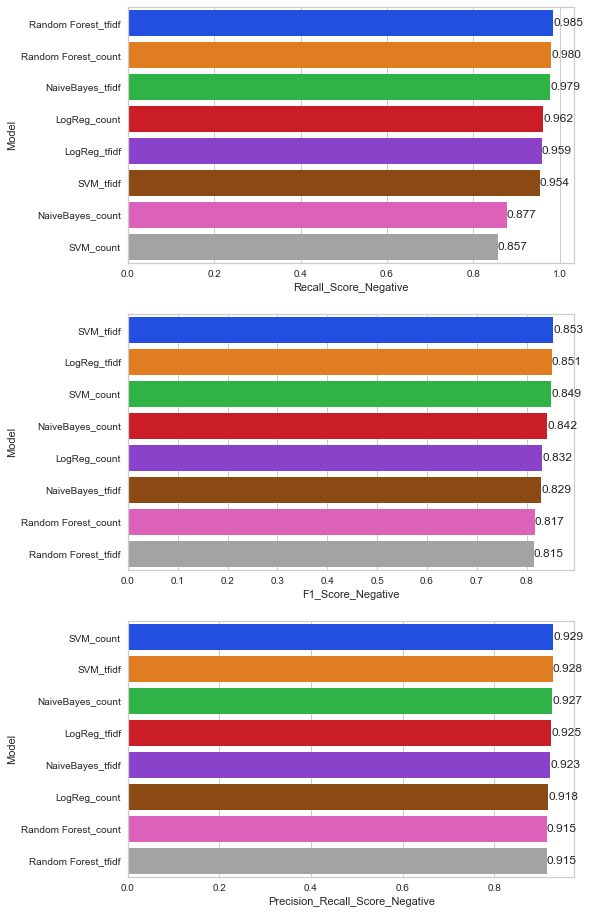

In [71]:
Model_comparison=pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf","Random Forest_tfidf"],
                        
                        "F1_Score_Negative": [NB_count_f1_neg[0], LR_count_f1_neg[0], SVM_count_f1_neg[0], RF_count_f1_neg[0], 
                                              NB2_tfidf_f1_neg[0], LR2_tfidf_f1_neg[0], SVM2_tfidf_f1_neg[0], RF2_tfidf_f1_neg[0]],
                        
                        "Recall_Score_Negative": [NB_count_rec_neg[0], LR_count_rec_neg[0], SVM_count_rec_neg[0], 
                                                   RF_count_rec_neg[0], NB2_tfidf_rec_neg[0], LR2_tfidf_rec_neg[0], 
                                                  SVM2_tfidf_rec_neg[0], RF2_tfidf_rec_neg[0]],
                        
                        "Precision_Recall_Score_Negative": [NB_AP_neg, LR_AP_neg, SVM_AP_neg, RF_AP_neg, NB2_tfidf_AP_neg, 
                                                            LR2_tfidf_AP_neg, SVM2_tfidf_AP_neg, RF2_tfidf_AP_neg]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 3 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(8,16))

plt.subplot(311)
Model_comparison=Model_comparison.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=Model_comparison, palette="bright")
labels(ax)

plt.subplot(312)
Model_comparison=Model_comparison.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=Model_comparison, palette="bright")
labels(ax)


plt.subplot(313)
Model_comparison=Model_comparison.sort_values(by="Precision_Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Precision_Recall_Score_Negative", y="Model", data=Model_comparison, palette="bright")
labels(ax)
plt.show();

### Cross Validation of Models

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision for negative': make_scorer(precision_score, average=None, labels=["negative"]),
                 'recall for negative': make_scorer(recall_score, average=None, labels = ["negative"]),
                 'f1_score for negative': make_scorer(f1_score, average=None, labels = ["negative"]),
                 
                 'precision for neutral': make_scorer(precision_score, average=None, labels=["neutral"]),
                 'recall for neutral': make_scorer(recall_score, average=None, labels = ["neutral"]),
                 'f1_score for neutral': make_scorer(f1_score, average=None, labels = ["neutral"]),
                 
                 'precision for positive': make_scorer(precision_score, average=None, labels=["positive"]),
                 'recall for positive': make_scorer(recall_score, average=None, labels = ["positive"]),
                 'f1_score for positive': make_scorer(f1_score, average=None, labels = ["positive"]),
                 }

for i, j  in custom_scorer.items():
    model = LogisticRegression(C=0.4, max_iter=1000)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j, n_jobs = -1).mean()
    print(f" {i:20} score : {scores}\n")

 accuracy             score : 0.7596612042682926

 precision for negative score : 0.7604711122919129

 recall for negative  score : 0.9627997170583761

 f1_score for negative score : 0.8497010281842352

 precision for neutral score : 0.6891070018314178

 recall for neutral   score : 0.35316393582522615

 f1_score for neutral score : 0.46579442456917813

 precision for positive score : 0.8361927189070217

 recall for positive  score : 0.5036108068638188

 f1_score for positive score : 0.6272777378662984



### Model Cross Validation of Logistic Regression

Logistic Regression Model
Test_Set
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      2753
     neutral       0.70      0.39      0.50       930
    positive       0.83      0.49      0.62       709

    accuracy                           0.76      4392
   macro avg       0.76      0.61      0.66      4392
weighted avg       0.76      0.76      0.74      4392

Train_Set
              precision    recall  f1-score   support

    negative       0.80      0.98      0.88      6425
     neutral       0.82      0.49      0.62      2169
    positive       0.88      0.59      0.71      1654

    accuracy                           0.81     10248
   macro avg       0.84      0.69      0.74     10248
weighted avg       0.82      0.81      0.80     10248



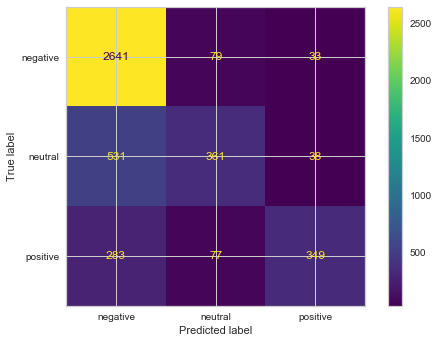

In [73]:
LR=LogisticRegression(C=0.4, max_iter=1000).fit(X_train_tf_idf, y_train)
print("Logistic Regression Model")
eval(LR, X_train_tf_idf, X_test_tf_idf)